<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Выделение-выборок" data-toc-modified-id="Выделение-выборок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выделение выборок</a></span></li><li><span><a href="#Обучение-моделей-без-учёта-дисбаланса-классов" data-toc-modified-id="Обучение-моделей-без-учёта-дисбаланса-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей без учёта дисбаланса классов</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Цель исследования** - построить модель с максимально большим значением *F1*-меры.

**Задачи исследования**:
1. Изучить и подготовить данные;
2. Исследовать качество разных моделей, меняя гиперпараметры, без учёта дисбаланса классов;
3. Уменьшить влияние дисбаланса классов;
4. Проверить модель на качество и вменяемость на тестовой выборке.

**Ход исследования**

В первую очередь необходимо изучить и подготовить данные. На втором этапе подготовленные данные разделить на обучающую, валидационную и тестовую выборки, после чего приступить к исследованию разных моделей. Определив наилучшую модель, необходимо увеличить её качество с учётом имеющегося в данных дисбаланса классов. Определившись с итоговой моделью, необходимо проверить её на качество и адекватность.

## Подготовка данных

Подключаемые все необходимые для выполнения исследования библиотеки:

In [66]:
import pandas as pd # работа с табличными данными
from sklearn.model_selection import train_test_split # выделение выборок
from sklearn.utils import shuffle # перемешивание данных 
from sklearn.tree import DecisionTreeClassifier, plot_tree # модель решающее дерево
from sklearn.ensemble import RandomForestClassifier # модель случайный лес
from sklearn.linear_model import LogisticRegression # Модель логистической регресии
from sklearn.metrics import f1_score # F1-мера для оценки качества классификации
from sklearn.metrics import roc_curve # ROC-кривая
from sklearn.metrics import roc_auc_score # AUC-ROC
import matplotlib.pyplot as plt # графики
import numpy as np # инициализация random_state для всех расчётов

Открываем файл с данными:

In [67]:
data = pd.read_csv('/datasets/Churn.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Выводим общую информацию:

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Определяем, в каких столбцах есть пропуски:

In [69]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Избавляемся от пропусков:

In [71]:
data = data.dropna(subset=['Tenure'])

<div class="alert alert-info"> <b>Комментарии студента:</b> Исходных данных недостаточно, чтобы заполнить этот столбец (заполнять медианным значением по каким-то группам нелогично). Заполнял нулями (ставил «заглушку») - качество итоговой модели было хуже. Оставил вариант с удалением (сократилось 9 % от всего объёма). </div>

Проверяем, что пропусков не осталось:

In [72]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверяем на наличие явных дубликатов:

In [73]:
data.duplicated().sum()

0

Проверяем данные на распределение целевого признака - сбалансированность классов:

In [74]:
data['Exited'].value_counts(normalize=True)

0    0.796062
1    0.203938
Name: Exited, dtype: float64

Преобразуем категориальные признаки Gender и Geography в численные с помощью техники прямого кодирования, или отображения (англ. One-Hot Encoding, OHE). При этом поле Surname исключаем из расчётов (фильтрация ненужных признаков):

In [75]:
data_ohe = pd.get_dummies(data.drop('Surname', axis = 1), drop_first=True)

Проверяем результат преобразования:

In [76]:
data_ohe

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,9996,15606229,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


**Выводы**

В таблице 10 000 записей и 14 столбцов. Данных достаточно для построения моделей. 
Пропущенные значения есть только в столбце Tenure - сколько лет человек является клиентом банка, их 909. Поскольку их заполнить по имеющимися данным невозможно, от таких значений просто избавились. Явных дубликатов нет. Имеет место дисбаланс классов. В подготовку признаков входило преобразование категориальных признаков Gender и Geography в численные с помощью техники OHE. Приступаем к разделению исходных данных на обучающую, валидационную и тестовую выборки.

## Исследование задачи

### Выделение выборок

Задаём random_state для всех расчётов:

In [77]:
state = np.random.RandomState(12345)

Разбиваем данные на обучающую, валидационную и тестововую выборки:

In [78]:
features = data_ohe.drop(['CustomerId', 'Exited', 'RowNumber'], axis=1)
target = data_ohe['Exited'] 

features_train, features_valid, target_train, target_valid = train_test_split(features, target, stratify = target, \
                                                                              train_size=0.6, random_state=state)

features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, stratify = target_valid, \
                                                                            train_size=0.5, random_state=state)

Проверяем размеры получившихся выборок:

In [79]:
print('Обучающая:', target_train.shape[0])
print('Валидационная:', target_valid.shape[0])
print('Тестовая:', target_test.shape[0])

Обучающая: 5454
Валидационная: 1818
Тестовая: 1819


### Обучение моделей без учёта дисбаланса классов

Решающее дерево:

In [80]:
result_list = []
depth_list = []
best_model_dt = None
best_result_dt = 0
best_depth_dt = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=state, max_depth=depth) # инициализируем модель DecisionTreeClassifier 
    model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # получаем предсказания модели на валидационной выборке
    result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики accuracy на валидационной выборке
    result_list.append(result)
    depth_list.append(depth)
    if result > best_result_dt:
        best_model_dt = model
        best_result_dt = result
        best_depth_dt = depth

print("F1 наилучшей модели решающего дерева на валидационной выборке:", best_result_dt, "Максимальная глубина:", best_depth_dt)

F1 наилучшей модели решающего дерева на валидационной выборке: 0.5709342560553633 Максимальная глубина: 6


Строим график:

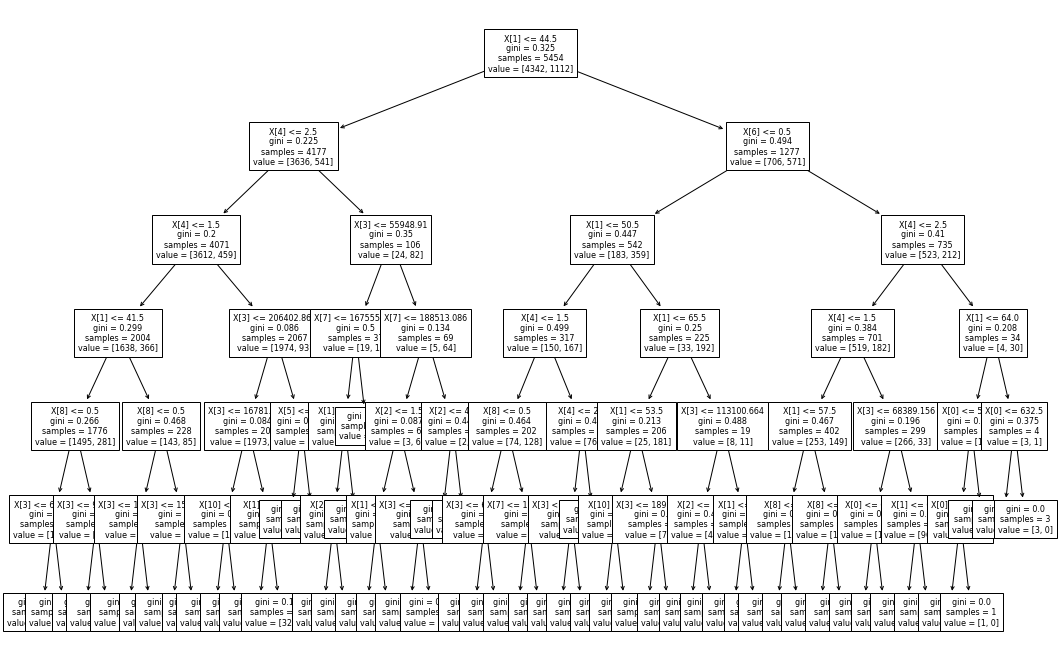

In [81]:
plt.figure(figsize=(18,12)) 
plot_tree(best_model_dt, fontsize=8)
plt.show()

Случайный лес:

In [82]:
%%time

best_model_rf = None
best_result_rf = 0
best_est = 0
best_depth_rf = 0
for est in range(10, 51, 10):
    for depth in range(1, 11):
        model = RandomForestClassifier(random_state=state, n_estimators = est, max_depth=depth) # инициализируем модель RandomForestClassifier 
        model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
        predictions_valid = model.predict(features_valid) # получаем предсказания модели на валидационной выборке
        result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики accuracy на валидационной выборке
        if result > best_result_rf:
            best_model_rf = model
            best_result_rf = result
            best_est = est
            best_depth_rf = depth

print("F1 наилучшей модели случайного леса на валидационной выборке:", best_result_rf, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth_rf)

F1 наилучшей модели случайного леса на валидационной выборке: 0.5870307167235495 Количество деревьев: 20 Максимальная глубина: 10
CPU times: user 6.27 s, sys: 23.8 ms, total: 6.3 s
Wall time: 6.3 s


In [83]:
model_lr = LogisticRegression(random_state=state, solver='liblinear')
model_lr.fit(features_train, target_train)
predicted_valid = model_lr.predict(features_valid)
print("F1 логистической регрессии:", f1_score(target_valid, predicted_valid))

F1 логистической регрессии: 0.072992700729927


**Выводы**

Наилучший результат на валидационной выборке показала модель случайного леса с числом деревьев 20 и максимальной глубиной дерева 10 - F1-мера равна 0.59. Второй результат показала модель решающего дерева с максимальной глубиной дерева 6 - в этом случае метрика равна 0.57, при этом модель работает значительно быстрее. Третье место - у модели логистической регрессии с F1-мерой равной 0.1. На следующем этапе приступаем к борьбе с дисбалансом классов.

## Борьба с дисбалансом

Пытамеся улучшить качество модели, учитывая дисбаланс классов. Используем 3 разных варианта - взвешивание классов, увеличение и уменьшение выборок. Используем наилучшую модель из предыдущего этапа - модель случайного леса с количеством деревьев 20 и максимальной глубиной 10.

### Взвешивание классов

In [84]:
model = RandomForestClassifier(random_state=state, n_estimators = 20, max_depth=10, class_weight = 'balanced') # инициализируем модель RandomForestClassifier 
model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
predictions_valid = model.predict(features_valid) # получаем предсказания модели на тестовой выборке
result_cw = f1_score(target_valid, predictions_valid) # посчитаем значение метрики accuracy на тестовой выборке
print("F1 с учётом взвешивание классов", result_cw)    

F1 с учётом взвешивание классов 0.6096551724137931


### Увеличение выборки

In [85]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=state)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

model = RandomForestClassifier(random_state=state, n_estimators = 20, max_depth=10) # инициализируем модель RandomForestClassifier 
model.fit(features_upsampled, target_upsampled) # обучаем модель на тренировочной выборке
predictions_valid = model.predict(features_valid) # получаем предсказания модели на тестовой выборке
result_upsample = f1_score(target_valid, predictions_valid) # посчитаем значение метрики accuracy на тестовой выборке
print("F1 с учётом увеличение выборки положительного класса", result_upsample) 

F1 с учётом увеличение выборки положительного класса 0.5394736842105263


### Уменьшение выборки

In [86]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=state)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=state)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=state)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

model = RandomForestClassifier(random_state=state, n_estimators = 20, max_depth=10) # инициализируем модель RandomForestClassifier 
model.fit(features_downsampled, target_downsampled) # обучаем модель на тренировочной выборке
predictions_valid = model.predict(features_valid) # получаем предсказания модели на тестовой выборке
result_downsample = f1_score(target_valid, predictions_valid) # посчитаем значение метрики accuracy на тестовой выборке
print("F1 с учётом уменьшение выборки отрицательного класса", result_downsample) 

F1 с учётом уменьшение выборки отрицательного класса 0.4738675958188154


**Выводы**

Использование взвешивания классов при инициализации модели позволило увеличить F1-меру на валидационной выборке с 0.59 до 0.61. Другие техники эту меру уменьшили. Переходим к тестированию итоговой модели.

## Тестирование модели

In [87]:
model = RandomForestClassifier(random_state=state, n_estimators = 20, max_depth=10, class_weight = 'balanced') # инициализируем модель RandomForestClassifier 
model.fit(pd.concat([features_train, features_valid]), pd.concat([target_train, target_valid])) # обучаем модель на объединённом наборе данных
predictions_test = model.predict(features_test) # получаем предсказания модели на тестовой выборке
result = f1_score(target_test, predictions_test) # посчитаем значение метрики accuracy на тестовой выборке
print("F1 наилучшей модели RandomForestClassifier на тестовой выборке:", result) 

F1 наилучшей модели RandomForestClassifier на тестовой выборке: 0.6021220159151193


Строим ROC-кривую:

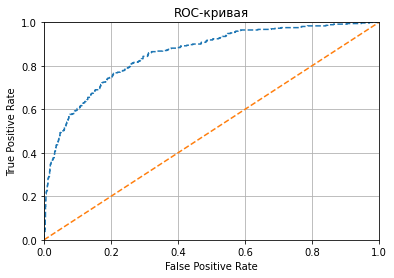

In [88]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()

plt.plot(fpr, tpr, linestyle='--')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.grid()
plt.show()

Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»):

In [89]:
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8561627898318714


**Выводы**

На тестовой выборке F1-мера равна 0.60 - переобучения нет. Для модели, которая всегда отвечает случайно, ROC-кривая выглядит как прямая, идущая из левого нижнего угла в верхний правый,  AUC-ROC случайной модели равна 0.5. В нашем случае график выше, выше значение TPR и лучше качество модели, AUC-ROC составляет 0.86 - модель проходит проверку на адекватность (вменяемость).

## Общие выводы

Исследование прошло в 4 этапа:
1. Изучение и подготовка данных;
2. Исследование качества разных моделей, меняя гиперпараметры, без учёта дисбаланса классов;
3. Борьба с дисбалансом классов;
4. Проверка модели на качество и вменяемость на тестовой выборке.
 
На первом этапе был выполнен обзор данных, в ходе которого определялось их качество и наличие ошибок. Предобработка данных включала в себя удаление пропущенных значений и подготовку признаков - преобразование категориальных признаков в численные с помощью техники OHE. Также было установлено наличие в данных дисбаланса классов.

На втором этапе исследовалось качество разных моделей, перед этим исходные данные разделялись на обучающую, валидационную и тестовую выборки в соотношении 60%, 20% и 20% соответственно. Наилучший результат на валидационной выборке показала модель случайного леса с числом деревьев 20 и максимальной глубиной дерева 10 - F1-мера равна 0.59. Второй результат показала модель решающего дерева с максимальной глубиной дерева 6 - в этом случае метрика равна 0.57, при этом модель работает значительно быстрее. Третье место - у модели логистической регрессии с F1-мерой равной 0.1. 

На третьем этапе с целью увеличения качества модели учитывался имеющийся дисбаланс классов. Использовались 3 разные техники - взвешивание классов, увеличение и уменьшение выборок. Использование взвешивания классов позволило увеличить F1-меру на валидационной выборке с 0.59 до 0.61.

На заключительном этапе выполнялась проверка модели на качество и вменяемость. На тестовой выборке F1-мера составляет 0.60 - переобучения нет. ROC-кривая высокая, AUC-ROC составляет 0.86 - модель проходит проверку на адекватность (вменяемость).